<a href="https://colab.research.google.com/github/NobutakaShimada/sensing-lecture/blob/main/sensing2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## センシング工学第11回 最小二乗法(4)

前回までで最尤推定、最小二乗法による直線当てはめ、共分散・相関を考慮した誤差伝播則について学んだ。今回はpython/numpy/mapplotlibによるデータ処理の演習を行う。

### numpyの基礎

In [135]:
# matplot.pyplotでグラフやプロットの描画
import matplotlib.pyplot as plt
# numpyで数値や行列、基本的な統計処理をする
import numpy as np

In [136]:
# np.arrayの練習
# これはpythonのlist型
a = [1,2,3]
print(a)
print(type(a))


[1, 2, 3]
<class 'list'>


In [137]:
# numpyのarray型
b = np.array(a)
print(b)
print(type(b))

[1 2 3]
<class 'numpy.ndarray'>


In [138]:
c = np.array([0,-2,4])
b + c # 要素ごとに足し算できる

array([1, 0, 7])

In [139]:
b*c # 要素ごとに掛け算もできる。

array([ 0, -4, 12])

In [140]:
b**2,np.sqrt(b) # 要素ごとの累乗,平方根

(array([1, 4, 9]), array([1.        , 1.41421356, 1.73205081]))

In [141]:
np.dot(b,c) # ベクトルだと思って内積を取る

8

In [142]:
M = np.array([[1,2,3],[3,2,1]]) # 2x3行列
M

array([[1, 2, 3],
       [3, 2, 1]])

In [143]:
v = np.array([2,-1,3])
M@v # 行列の積

array([9, 7])

In [144]:
M*v # *だと要素ごとの積を取ってしまう

array([[ 2, -2,  9],
       [ 6, -2,  3]])

### データプロットと回帰

In [145]:
x = np.array([1,2,3,4,5]).astype(float)
y = np.array([4,2,1,2,0]).astype(float)

In [146]:
### print(len(x),len(y))
print("x=%s y=%s"%(x,y))

x=[1. 2. 3. 4. 5.] y=[4. 2. 1. 2. 0.]


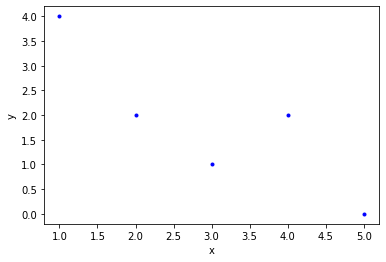

In [147]:
plt.scatter(x,y,marker='.',color="blue")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 最小二乗法による直線当てはめ y=A+Bx
データ対${(x_i,y_i)$に対して直線（１次式）$y=A+Bx$を最小二乗法で当てはめよう。$x$は独立変数で誤差は0，$y$の誤差$\delta y$は平均0の分散未知の正規分布に従うとして最尤推定を行うと以下の残差の総和を最小にするものが解となる。

\begin{eqnarray}
S = \sum{(y-A-Bx)^2}
\end{eqnarray}

偏微分して０とおくと以下の正規方程式が得られる。
\begin{eqnarray}
AN+B\sum x &=& \sum y \\
A\sum x + B\sum x^2 &=& \sum xy
\end{eqnarray}
これを解くと
\begin{eqnarray}
A &=& \frac{(\sum x^2)(\sum y)-(\sum x)(\sum xy)}{\Delta}, \,\,\,
B &=& \frac{(\sum x)(\sum y)-N(\sum xy)}{\Delta}\\
\Delta &=& N\sum x^2 - (\sum x)^2
\end{eqnarray}
AとBの推定誤差の分散は
\begin{eqnarray}
\sigma_A &=& \sigma_y\sqrt{\frac{\sum x^2}{\Delta}}, \,\,\,
\sigma_B = \sigma_y\sqrt{\frac{N}{\Delta}} \\
\sigma_y &=& \sqrt{\frac{1}{N-2}\sum (y-A-Bx)^2}
\end{eqnarray}

In [148]:
# 最小二乗法による直線当てはめ y=A+Bx
def fit_line(x,y):
  if len(x) != len(y):
      print("xとyのデータ数が違うよ！")
      exit
  N = len(x)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_xx = np.sum(x**2)
  sum_xy = np.sum(x*y)
  Delta = N*sum_xx-(sum_x)**2
  print("N=%f sum(x)=%f sum(y)=%f sum(x^2)=%f sum(xy)=%f,Delta=%f"%(N,sum_x,sum_y,sum_xx,sum_xy,Delta))
  A = (sum_xx*sum_y-sum_x*sum_xy)/Delta
  B = (N*sum_xy-sum_x*sum_y)/Delta
  sigma_y = np.sqrt(np.sum((y-A-B*x)**2)/(N-2))
  sigma_A = sigma_y*np.sqrt(sum_xx/Delta)
  sigma_B = sigma_y*np.sqrt(N/Delta)
  return A,B,sigma_A,sigma_B,sigma_y

A,B,sA,sB,sy = fit_line(x,y)
print("A=%f B=%f, sigmaA=%f sigmaB=%f sigmay=%f"%(A,B,sA,sB,sy))

N=5.000000 sum(x)=15.000000 sum(y)=9.000000 sum(x^2)=55.000000 sum(xy)=19.000000,Delta=50.000000
A=4.200000 B=-0.800000, sigmaA=0.938083 sigmaB=0.282843 sigmay=0.894427


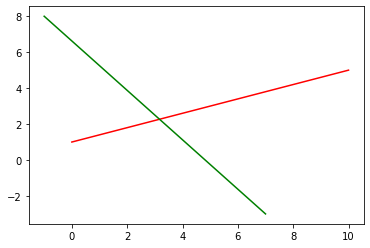

In [149]:
#(x1,y1)から(x2,y2)へ直線を描く
#plt.plot([x1,x2],[y1,y2]) #最初にxの区間、次にyの区間であることに注意
plt.plot([0,10],[1,5],color="red")
plt.plot([-1,7],[8,-3],color="green")
plt.show()

N=5.000000 sum(x)=15.000000 sum(y)=9.000000 sum(x^2)=55.000000 sum(xy)=19.000000,Delta=50.000000


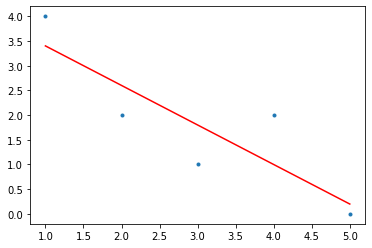

In [150]:
plt.scatter(x,y,marker='.')
A,B,sA,sB,sy = fit_line(x,y)
def y_est(x,A,B):
    return A+B*x
xmin = np.min(x)
xmax = np.max(x)
plt.plot([xmin,xmax],[y_est(xmin,A,B),y_est(xmax,A,B)],color="red")
plt.show()

### ライブラリモジュールを使った最小二乗法

[-0.8  4.2]


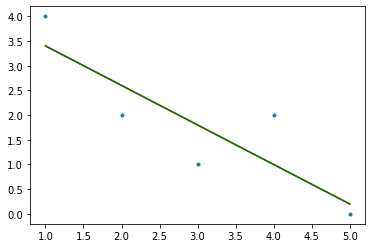

In [151]:
# np.polyfit(x,y,dim) # y=f(x;p)(fは次数dimの回帰多項式、pは回帰多項式の係数)
# 返り値はnp.ndarray(1次元)。高い次数の係数から並ぶのでpred[0]が1次、pred[1]が0次の係数
pred = np.polyfit(x,y,1)
print(pred)
plt.scatter(x,y,marker='.')
xmin = np.min(x)
xmax = np.max(x)
plt.plot([xmin,xmax],[y_est(xmin,A,B),y_est(xmax,A,B)],color="red")
plt.plot([xmin,xmax],[y_est(xmin,A,B),y_est(xmax,pred[1],pred[0])],color="green")
plt.show()

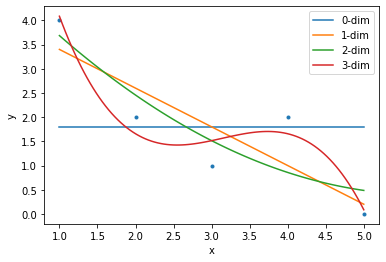

In [152]:
# 2次式以上でフィッティングしてみる
def polynomial_fit(x,y,maxdim=4,xlim=[],ylim=[]):
  cmap = plt.get_cmap("tab10") #色のindexを並べたcolormapを取得
  pred = []
  for dim in range(maxdim):
    #dim次元の多項式で最小二乗法。
    #cov=Trueの時は(推定値、共分散行列)のタプルが帰る
    pred.append(np.polyfit(x,y,dim,cov=True))
    #print("dim[%d]: %s"%(dim,pred))

  plt.scatter(x,y,marker='.')
  if xlim == []:
    xmin = np.min(x)
    xmax = np.max(x)
  else:
    xmin = xlim[0]
    xmax = xlim[1]

  xs = np.linspace(xmin, xmax, 100)
  plt.xlabel("x")
  plt.ylabel('y')
  plt.ylim(*ylim)
  for dim in range(maxdim):
    # polyval(p,x): 多項式の係数がpであるときにxに対する式の値を返す。
    plt.plot(xs,np.polyval(pred[dim][0],xs),label='%d-dim'%dim,color=cmap(dim))
    

  plt.legend()
  return pred
    
pred = polynomial_fit(x,y)

In [153]:
pred[0] #0次式でのフィッティングにおける推定値（平均）と推定誤差の分散

(array([1.8]), array([[0.44]]))

In [154]:
pred[1] #1次式でのフィッティングにおける推定値（A=p[1],B=p[0]）と推定誤差の共分散

(array([-0.8,  4.2]),
 array([[ 0.08, -0.24],
        [-0.24,  0.88]]))

In [155]:
pred[2] #2次式でのフィッティングにおける推定値（平均）と誤差の分散

(array([ 0.14285714, -1.65714286,  5.2       ]),
 array([[ 0.0755102 , -0.45306122,  0.52857143],
        [-0.45306122,  2.82408163, -3.48857143],
        [ 0.52857143, -3.48857143,  4.86285714]]))

当てはめる多項式の次数が増えるに従って、返ってくる多項式のパラメータと共分散行列の次数はどうなっていますか？

### もっと多くのデータサンプルについて回帰してみる練習

ランダムノイズが加わったデータを作って、polyfitを使って多項式を回帰してみてください。

In [156]:
# 真のデータを生成するモデル
def model_func(x):
    #return x**3-4*x**2-4
    return 5*x-10

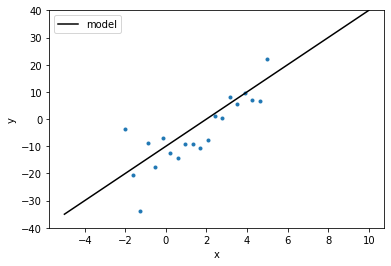

In [157]:
# モデル曲線の描画
xtrue = np.linspace(-5,10,100)
ytrue = model_func(xtrue)
plt.plot(xtrue,ytrue,label="model",color="black")

# 真のデータ点の生成（スパースにとる）
x2 = np.linspace(-2,5,20)
y2 = model_func(x2)
# ノイズの乗ったデータ点の生成
ynoise = np.random.normal(0,10,len(x2)) # 平均0、分散3の正規分布からの独立サンプル
y2_noise = y2 + ynoise
plt.ylim(-40,40)
plt.xlabel('x')
plt.ylabel('y')
#plt.plot(x2,y2_noise,'.',color="blue")
plt.scatter(x2,y2_noise,marker='.')
plt.legend()
plt.show()

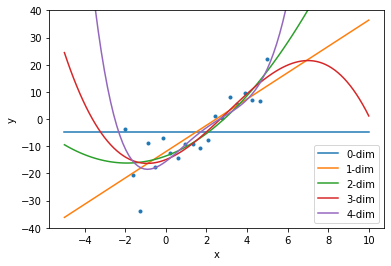

In [158]:
pred = polynomial_fit(x2,y2_noise,maxdim=5,xlim=[-5,10],ylim=[-40,40])

フィットする多項式の次数(maxdim)を増やしていくと推定した曲線はどうなるか確認しよう。
データ点数が20点なら19次まで形式的には当てはめることができる。その結果は妥当だろうか？

### 当てはめた直線の誤差を可視化しよう

講義では$y=A+Bx$の当てはめにおいて、Aの推定値の推定誤差の分散$\sigma_A^2,Bに対する\sigma_B^2$のみ導出したが、上の計算でdim=1の場合のpolynomial_fit()の返り値のうち、dim=1（つまり一次式の当てはめ）の場合の返り値pred[1]のうち推定誤差の分散を表す第二成分pred[1][1]は「2x2の対称行列」になっている。

In [162]:
pred[1][1]

array([[ 0.58262449, -0.87393674],
       [-0.87393674,  3.94038142]])

対角成分はそれぞれ$\sigma_A^2$と$\sigma_B^2$に対応するが、そうでない成分はなんだろうか？実はこれは$A$の推定誤差と$B$の推定誤差の「共分散」$\sigma_{AB}$である。

すなわち、$A$と$B$の推定値は必ずしも無相関ではない。$\sigma_{AB}\neq 0$の場合はAの誤差とBの誤差には関係が出てくる。この共分散の導出方法は授業ではまだ述べていなかった。次の補足資料を読むとある程度理解できるだろう。
https://github.com/NobutakaShimada/sensing-lecture/blob/main/%E3%82%BB%E3%83%B3%E3%82%B7%E3%83%B3%E3%82%B0%E5%B7%A5%E5%AD%A6%E7%B7%9A%E5%BD%A2%E5%BD%93%E3%81%A6%E3%81%AF%E3%82%81.pdf

AとBが$\sigma_A^2$,$\sigma_B^2$,$\sigma_{AB}$の分散・共分散をもつ誤差を含む場合、$y=A+Bx$による$y$の推定値$\hat{y}$の誤差の分散($\sigma^2_{\hat{y}}$)を誤差が独立ではない場合の誤差伝播則を用いて計算すると(xの誤差は独立変数なので0とする)、
\begin{eqnarray}
\sigma^2_{\hat{y}} &=& \left(\frac{\partial y}{\partial A}\right)^2\sigma_A^2+\left(\frac{\partial y}{\partial B}\right)^2\sigma_B^2+2\left(\frac{\partial y}{\partial A}\right)\left(\frac{\partial y}{\partial B}\right)\sigma_{AB} \\
&=& \sigma^2_Bx^2+2\sigma_{AB}x+\sigma^2_A \\
\, \nonumber
\end{eqnarray}
これは$x$の二次関数である。$y$の真の値は、誤差が正規分布に従うと仮定できる場合、誤差の標準偏差$\sigma_{\hat{y}}$を考慮して$\hat{y}\pm2\sigma_{\hat{y}}$の間に95\%の確率で入ってくると考えることは妥当である。

そこで、この値をデータに対してplotしてみることにしよう。$x$ごとの$y\pm2\sigma_{\hat{y}}$を同時に描いてみればよい。

In [159]:
# A,Bの分散、共分散を取り出す
p_linear = pred[1][0] # 1次式での回帰パラメータ
sA2 = pred[1][1][1,1] # sigma^2_A
sB2 = pred[1][1][0,0] # sigma^2_B
sAB = pred[1][1][0,1] # sigma_AB, pred[1][1][1,0]でもよい（共分散行列は対称なので）
sA2,sB2,sAB

(3.9403814228418073, 0.5826244905369213, -0.8739367358053816)

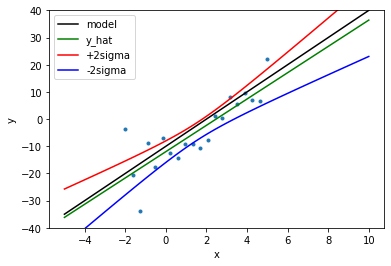

In [160]:
# yの推定誤差を考慮して推定直線の上下に95%信頼区間(=2sigma)を描画してみる
sigma2_yhat = xtrue**2*sB2+2*xtrue*sAB+sA2 #sigmaはscalarだがxsは1次元のnp.array
s_yhat = np.sqrt(sigma2_yhat)
plt.plot(xtrue,ytrue,label='model',color="black")

yhat = np.polyval(p_linear,xtrue)
plt.plot(xtrue,yhat,label='y_hat',color='green')
plt.plot(xtrue,yhat+2*s_yhat,label='+2sigma',color="red")
plt.plot(xtrue,yhat-2*s_yhat,label='-2sigma',color="blue")
plt.ylim(-40,40)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# データ
plt.scatter(x2,y2_noise,marker='.')
plt.show()

上の黒の直線がデータを生成したモデルである（つまり真の直線）。緑ラインは線形回帰によって当てはめた直線（最小二乗法によって最尤推定されたもの）。赤と青のラインは、得られたデータから推定された、真の$y$が約95\%の確率で入る区間の上限と下限（$\hat{y}\pm2\sigma_{\hat{y}}$）である。

これをみると、$\hat{y}$の誤差（つまり赤と青のラインのy方向への間隔）が最小なのはデータ点の$x$座標の平均の位置であることがわかる。その時推定された回帰直線はデータ点の$y$の平均$(x,y)$の重心を通ることもわかる（簡単に証明できるが各自の課題とする）。重心の位置における$\hat{y}$の誤差の大きさは直線の切片パラメータ（つまり$A$）の誤差と等しい。

さらにわかることはデータ点の$x$の平均から離れるに従って$\hat{y}$の誤差は大きくなることがわかる。これは直線の傾き$B$が持つ誤差によって直線が回転する方向に不確かだということを意味している。回帰直線は必ずデータの重心を通るからここを中心に回転することになるわけで、重心から離れるに従って直線上の点（つまり$x$に対応する$y$の推定値）が大きく動くことになる。これは「外挿」が「内挿」よりも不確かになる、という我々の経験的事実と合致している。

Pythonではnumpyの他にさまざまな統計解析モジュールパッケージが公開されており、機械学習用のパッケージに含まれていることもある。また描画に使ったpyplotはmatplotlibという可視化パッケージの一部であり、この他にも3次元プロットやアニメーションなど数多くの機能を持っている。ぜひ自分でも試してみてほしい。